In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import Lasso, LassoCV, LinearRegression, RidgeCV

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import mean_squared_error

%matplotlib inline

## Chapter 6 Linear Model Selection and Regularization

## Exercises
### Conceptual

**1** We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain $p+1$ models containing $0,1,2, \dots ,p$ predictors. Explain your answers:

**1a** Which of the three models with $k$ predictors has the smallest training RSS?

> The model with $k$ predictors with the smallest training RSS will be the one obtained from best subset selection because it is selected amongfrom all models with $k$ predictors.

**1b** Which of the three models with $k$ predictors has the smallest test RSS?

> This is impossible to answer.

**1c** True or False:

**i** The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the $(k+1)$-variable model identified by forward stepwise selection.

> True

**ii**The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k+1)$-variable model identified by backward stepwise selection.

> True

**iii** The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k+1)$-variable model identified by forward stepwise selection.

> False

**iv** The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the $(k+1)$-variable model identified by backward stepwise selection.

> False

**v** The predictors in the k-variable model identified by best subset are a subset of the predictors in the $(k+1)$-variable model identified by best subset selection.

> False

**2** For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.

**2a** The lasso, relative to least squares, is:
+ *i* More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.
+ *ii* More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

+ *iii* Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

+ *iv* Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

> iii, the lasso is less flexible;

**2b** Repeat (a) for ridge regression relative to least squares.

> iii, ridge regression is also less flexible;

**2c** Repeat (a) for non-linear methods relative to least squares.

> ii, non-linear method are more flexible;

**3** Suppose we estimate the regression coefficients in a linear regression model by minimizing;

$$ \sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_ij)^2 \text{ subject to } \sum_{j=1}^p |\beta_j| <= s$$

for a particular value of $s$. 

For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

**3a** As we increase s from 0, the training RSS will:

+ *i* Increase initially, and then eventually start decreasing in an inverted U shape.

+ *ii* Decrease initially, and then eventually start increasing in a U shape.

+ *iii* Steadily increase.

+ *iv* Steadily decrease.

+ *v* Remain constant.

> iv, as we increase $s$, we put less restriction on $\beta_j$, resulting in the betas approaching their least squares estimates and descreasing the training RSS.

**3b** Repeat (a) for test RSS.

> ii, As we approach the least square estimate for the beta, the test RSS will decrease, but as the model becomes more flexible, this would lead to overfitting and a subsequent increase in the test RSS.

**3c** Repeat (a) for variance.

> iii, with $s=0$ the model predicts a constant, so natually as we stop predicting simply a constant, the variance increases.

**3d** Repeat (a) for (squared) bias.

> iv, this has essentially the opposite effect when compared to variance (obviously).

**3e** Repeat (a) for the irreducible error.

> v, remain constant, we can't do anything to change this value.

**4** Suppose we estimate the regression coefficients in a linear regression model by minimizing;

$$ \sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_ij)^2 + \lambda\sum_{j=1}^p\beta_j^2$$


for a particular value of $\lambda$. 

For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

**4a** As we increase $\lambda$ from 0, the training RSS will:

+ *i* Increase initially, and then eventually start decreasing in an inverted U shape.

+ *ii* Decrease initially, and then eventually start increasing in a U shape.

+ *iii* Steadily increase.

+ *iv* Steadily decrease.

+ *v* Remain constant.

> iii, as $\lambda$ increases we are decreasing the betas from their least squares estimate, thus increasing the training RSS.

**4b** Repeat (a) for test RSS.

> ii, initially the betas are trying to closely fit the training data, so the test RSS would decrease, but eventually the model becomes too simple and the test RSS starts increasing again.

**4c** Repeat (a) for variance.

> iv, as the model becomes less flexible the variance continually decreases

**4d** Repeat (a) for (squared) bias.

> iii, as the model becomes much simpler (betas approach 0) the bias increases

**4e** Repeat (a) for the irreducible error.

> v, remain constant, we can't do anything to change this value.

**5** It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give different coefficient values to correlated variables. We will now explore this property in a very simple setting.

Suppose that $n=2$, $p=2$, $x_{11}=x_{12}$, $x_{21}=x_{22}$. Furthermore, suppose that $y_1+y_2=0$ and $x_{11}+x_{21}=0$ and $x_{12}+x_{22}=0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\beta_0=0$.

**5a** Write out the ridge regression optimization problem in this setting;

> Sub $\hat{\beta_0}=0$ and $n=p=2$ in to the general ridge regression optimization form; 
$$(y_1 - \hat{\beta_1}x_{11}-\hat{\beta_2}x_{12})^2 + (y_1 - \hat{\beta_1}x_{21}-\hat{\beta_2}x_{22})^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$$
with $x_{11}=x_{12}$, $x_{21}=x_{22}$, we can say $x_{11}=x_{12}=x_1$, $x_{21}=x_{22}=x_2$ and then we have;
$$(y_1 - \hat{\beta_1}x_{1}-\hat{\beta_2}x_{1})^2 + (y_1 - \hat{\beta_1}x_{2}-\hat{\beta_2}x_{2})^2 + \lambda(\hat{\beta_1}^2 + \hat{\beta_2}^2)$$

**5b** Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta_1} = \hat{\beta_2}$.

> To find $\hat{\beta_1}$ and $\hat{\beta_2}$, we take the derivative of the equations above with respect to each and set them  equal to zero;
We end up with $\hat{\beta_1} = \frac{x_1y_1+x_2y_2-\hat{\beta_2}(x_1^2+x_2^2)}{\lambda+x_1^2+x_2^2}$ and $\hat{\beta_2} = \frac{x_1y_1+x_2y_2-\hat{\beta_1}(x_1^2+x_2^2)}{\lambda+x_1^2+x_2^2}$, we can see these equations are symmetric and that $\hat{\beta_1} = \hat{\beta_2}$.

**5c** Write out the lasso optimization problem in this setting.

> Sub $\hat{\beta_0}=0$ and $n=p=2$ in to the general lasso optimization form; 
$$(y_1-\hat{\beta_1}x_{11} - \hat{\beta_2}x_{12})^2 + (y_2-\hat{\beta_1}x_{21} - \hat{\beta_2}x_{22})^2 + \lambda(|\hat{\beta_1}| + |\hat{\beta_2}|)$$
or;
$$(y_1-\hat{\beta_1}x_{1} - \hat{\beta_2}x_{1})^2 + (y_2-\hat{\beta_1}x_{2} - \hat{\beta_2}x_{2})^2 + \lambda(|\hat{\beta_1}| + |\hat{\beta_2}|)$$

**5d** Argue that in this setting, the lasso coefficients $\hat{\beta_1}$ and $\hat{\beta_2}$ are not unique; in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

> We can use the alternative form of the lasso with constrain $|\hat{\beta_1}| + |\hat{\beta_2}| < s$, this results in a diamond shape and using the provided information we can simplify our equation to $(y_1-(\hat{\beta_1}+\hat{\beta_2})x_1)^2>=0$, which yields a solution of $\hat{\beta_1} + \hat{\beta_2} = \frac{y_1}{x_1}$. This means the edges $\hat{\beta_1} + \hat{\beta_2} = s$ and $\hat{\beta_1} + \hat{\beta_2} = -s$ are solutions.

**6** We will now explore (6.12) and (6.13) further.

**6a** Consider (6.12) with $p=1$. For some choice of $y_1$ and $\lambda>0$, plot (6.12) as a function of $\beta_1$. Your plot should confirm that (6.12) is solved by (6.14);

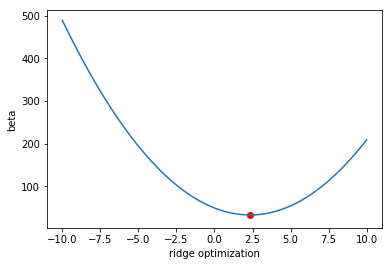

In [2]:
beta = np.linspace(-10, 10, 1000)
y = 7
lamb = 2
ridge = (y - beta)**2 + lamb * beta**2
sol = y/(1+lamb)
sol_val = (y - sol)**2 + lamb * sol**2
plt.plot(beta, ridge)
plt.scatter(sol, sol_val, c='r')
plt.xlabel('ridge optimization')
plt.ylabel('beta');

The red dot shows the calculated minimum point using 6.14, let's confirm it;

In [3]:
print(sol, beta[np.argmin(ridge)])

2.3333333333333335 2.3323323323323315


**6b** Consider (6.13) with $p=1$. For some choice of $y_1$ and $\lambda>0$, plot (6.13) as a function of $\beta_1$. Your plot should confirm that (6.13) is solved by (6.15).

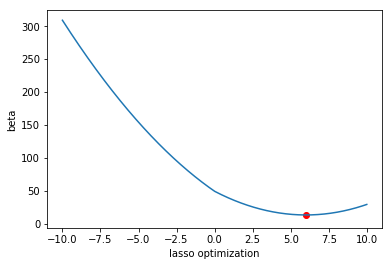

In [4]:
beta = np.linspace(-10, 10, 1000)
y = 7
lam = 2
lasso = (y - beta)**2 + lam * abs(beta)
sol = y - lam / 2
sol_val = (y - sol)**2 + lam * abs(sol)
plt.plot(beta, lasso)
plt.scatter(sol, sol_val, c='r')
plt.xlabel('lasso optimization')
plt.ylabel('beta');

The red dot shows the calculated minimum point using 6.15, let's confirm it;

In [5]:
print(sol, beta[np.argmin(lasso)])

6.0 5.995995995995996


**7** We will now derive the Bayesian connection to the lasso and ridge regression discussed in Section 6.2.2.

**7a** Suppose that $y_i = \beta_0 + \sum_{j=1}^px_{ij}\beta_j+\epsilon_i$ where $\epsilon_1, \dots,\epsilon_n$ are independent
and identically distributed from a N(0, σ2) distribution. Write out the likelihood for the data.

> I'm not sure how to use the multiplication summation in Latex, but eventually we end up with $$L(\theta|\beta) = (\frac{1}{\sigma\sqrt{2\pi}})^n exp[-\frac{1}{2\sigma^2}\sum_{i=1}^2(Y_i - (\beta_0+\sum_{j=1}^p\beta_jX_{ij}))^2]$$


**7b** Assume the following prior for $\beta: \beta_1 \dots \beta_p$ are independent and identically distributed according to a double-exponential distribution with mean 0 and common scale parameter $b$: i.e. $p(\beta)=\frac{1}{2b}exp(-\frac{|\beta|}{b})$ Write out the posterior for $\beta$ in this setting.

> This and the rest of this problem ended up being too much Latex for me, so I'm leaving it on my scrap paper. It is also one of the more challenging problems in the book so far!

**7c** Argue that the lasso estimate is the mode for β under this posterior distribution.

> Working through this, with some help, we want to take the posterior and work it through to the Lasso Equation, once this is done we will have shown that the posterior comes from a Laplace distribution.

**7d** Now assume the following prior for β: β1, . . . , βp are independent and identically distributed according to a normal distribution with mean zero and variance c. Write out the posterior for β in this setting.

> Left on notes.

**7e** Argue that the ridge regression estimate is both the mode and the mean for β under this posterior distribution.

> Left on notes.

### Applied

**8** In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

**8a** Use the rnorm() function to generate a predictor $X$ of length $n=100$, as well as a noise vector $\epsilon$ of length $n=100$.

In [6]:
random_seed = 42
X = np.random.normal(size=100)
eps = np.random.normal(size=100)

**8b** Generate a response vector $Y$ of length $n=100$ according to the model

$$Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$$

where $\beta_0$, $\beta_1$, $\beta_2$ and $\beta_3$ are constants of your choice.

In [7]:
b0 = 3
b1 = 2
b2 = -3
b3 = 0.3
Y = b0 + b1*X + b2*X**2 + b3*X**3 + eps

**8c** Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors X,X2,⋯,X10. What is the best model obtained according to Cp, BIC, and adjusted R2? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the data.frame() function to create a single data set containing both X and Y.

> Built best subset, forward and backard below. Scroll past graphs for the results of each stepwise feature selection.

In [8]:
df = pd.DataFrame({'X1': X, 'X2': X ** 2, 'X3': X**3, 'X4': X**4,'X5': X**5,
                   'X6': X**6,'X7': X**7,'X8': X**8,'X9': X**9,'X910': X**10,
                   'Y':Y}) #evaluation below kept seeing X10 as the second value

In [19]:
X = df.iloc[:, :-1]
y = df.Y

In [9]:
def fit_model(X, y):
    '''fits a model using OLS
    returns a dict with model, RSS score
    and subset of predictors used'''
    subset = (list(X.columns[1:]))
    result = sm.OLS(y,X).fit()
    
    RSS = ((result.predict(X)-y) ** 2).sum()
    
    return {"subset": subset, "model":result, "RSS":RSS, 'adjusted_r2':result.rsquared_adj}

In [10]:
def best_subsets(X,y):
    '''Returns a df of the best model
    for each subset size'''
    results = []
    for k in range(1,len(X.columns)+1):
        results.append(best_subset_k(X, y, k))
    
    models = pd.DataFrame(results)
    models.reset_index(inplace=True, drop=True)
    return models

In [11]:
def best_subset_k(X, y, k):
    '''returns the best model with k predictors'''
    results = []
    for combo in combinations(X.columns, k):
        features = [val for val in combo]

        X_sub = X[features]
        X_sub = sm.add_constant(X_sub)
    
        results.append(fit_model(X_sub,y))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['adjusted_r2'].argmax()]
    
    return best_model

In [12]:
def forward(X, y, score = 'Adjusted_R2'):
    
    best_model = best_subset_k(X, y, 1)
    predictors = best_model.subset

    if score == 'AIC':
        best_ts = best_model['model'].aic
 
    elif score == 'BIC':
        best_ts = best_model['model'].bic

    else:
        best_ts = best_model['model'].rsquared_adj
            
    results = []
    
    for k in range(2,len(X.columns)):
        remaining_predictors = [p for p in X.columns if p not in predictors]
        for combo in combinations(remaining_predictors, k-1):
            features = [val for val in combo]
            features = predictors + features
            X_sub = X[features]
            
            X_sub = sm.add_constant(X_sub)
            
            results.append(fit_model(X_sub,y))
            
            models = pd.DataFrame(results)
    
        curr_best_model = models.loc[models['adjusted_r2'].argmax()]
        
        if score == 'AIC':
            test_stat = curr_best_model['model'].aic
 
        elif score == 'BIC':
            test_stat = curr_best_model['model'].bic

        else:
            test_stat = curr_best_model['model'].rsquared_adj
                
        if score != 'Adjusted_R2':
            if test_stat < best_ts:
                predictors = remaining_predictors
                best_model = curr_best_model
                lowest_ts = test_stat
        else:
            if test_stat > best_ts:

                predictors = remaining_predictors
                best_model = curr_best_model
                lowest_ts = test_stat
                
    return best_model

In [13]:
def backward(X, y, score = 'Adjusted_R2'):
    best_model = fit_model(X, y)
    predictors = best_model['subset']
    
    if score == 'AIC':
        best_ts = best_model['model'].aic
 
    elif score == 'BIC':
        best_ts = best_model['model'].bic

    else:
        best_ts = best_model['model'].rsquared_adj
    
    results = []

    best = False

    while best == False:
        
        start_ts = best_ts

        for p in predictors:
            
            remaining_predictors = [px for px in predictors if px != p]

            X_sub = X[remaining_predictors]
            
            X_sub = sm.add_constant(X_sub)

            curr_model = fit_model(X_sub,y)
            
            if score == 'AIC':
                test_stat = curr_model['model'].aic
 
            elif score == 'BIC':
                test_stat = curr_model['model'].bic

            else:
                test_stat = curr_model['model'].rsquared_adj
            
            if score != 'Adjusted_R2':
                if test_stat < best_ts:

                    predictors = remaining_predictors
                    best_model = curr_model
                    lowest_ts = test_stat
            else:
                if test_stat > best_ts:

                    predictors = remaining_predictors
                    best_model = curr_model
                    lowest_ts = test_stat
                
        if best_ts == start_ts:
            best = True
    
    return pd.Series(best_model)

In [14]:
def best_model(X, y, alg='best', score='Adjusted_R2'):
    if alg =='forward':
        return forward(X, y, score)
    if alg == 'backward':
        return backward(X, y, score)
    
    models = best_subsets(X,y)
    return models.loc[models['adjusted_r2'].argmax()]

In [22]:
models = best_subsets(X,y)

In [23]:
models

,RSS,adjusted_r2,model,subset
0,745.423309,0.487948,<statsmodels.regression.linear_model.Regressio...,[X2]
1,137.519334,0.904560,<statsmodels.regression.linear_model.Regressio...,"[X1, X2]"
2,99.271513,0.930387,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X3]"
3,98.276073,0.930360,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X3, X910]"
4,91.502682,0.934470,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X3, X5, X9]"
5,90.937364,0.934174,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X3, X6, X7, X8]"
6,90.672269,0.933653,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X3, X4, X6, X8, X9]"
7,90.082065,0.933360,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X4, X5, X6, X7, X8, X910]"
8,89.700589,0.932905,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X4, X5, X6, X7, X8, X9, X910]"
9,89.220296,0.932514,<statsmodels.regression.linear_model.Regressio...,"[X1, X2, X3, X4, X5, X6, X7, X8, X9, X910]"


In [24]:
best_model(X,y)

RSS                                                      91.5027
adjusted_r2                                              0.93447
model          <statsmodels.regression.linear_model.Regressio...
subset                                      [X1, X2, X3, X5, X9]
Name: 4, dtype: object

In [25]:
models['aic'] = models.apply(lambda row: row[2].aic, axis=1)
models['bic'] = models.apply(lambda row: row[2].bic, axis=1)

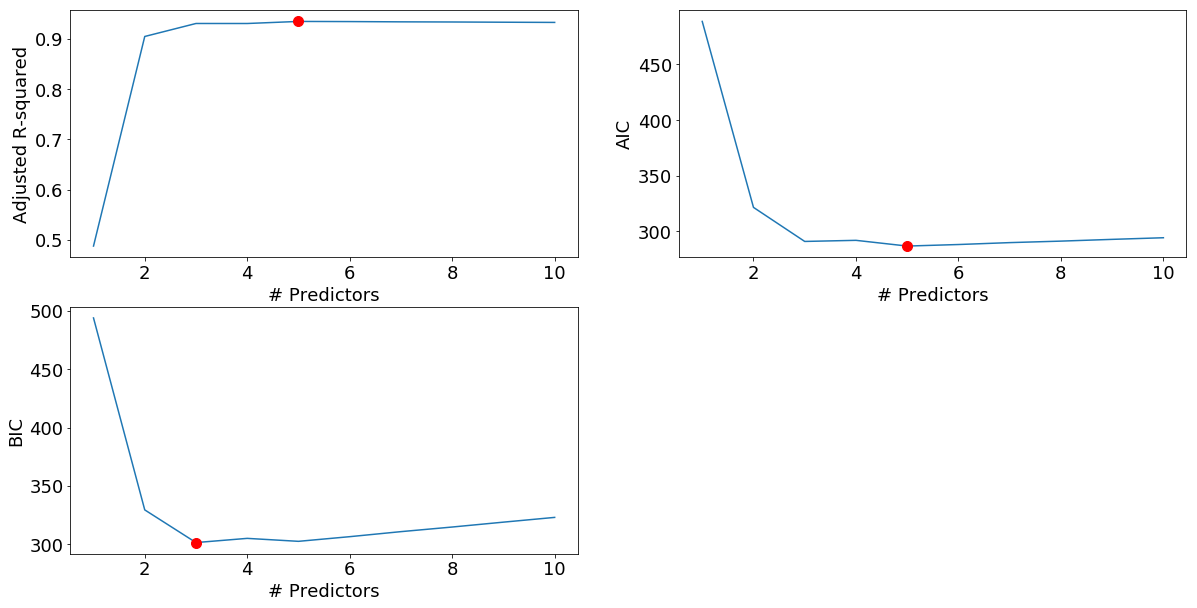

In [26]:
#using best subset
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

num_predict = models.apply(lambda row: len(row[3]), axis=1)

plt.subplot(2, 2, 1)
plt.plot(num_predict, models['adjusted_r2'])
plt.plot(num_predict[models['adjusted_r2'].argmax()], models['adjusted_r2'].max(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('Adjusted R-squared')

plt.subplot(2, 2, 2)
plt.plot(num_predict, models['aic'])
plt.plot(num_predict[models['aic'].argmin()], models['aic'].min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('AIC')

plt.subplot(2, 2, 3)
plt.plot(num_predict, models['bic'])
plt.plot(num_predict[models['bic'].argmin()], models['bic'].min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('BIC');

**8d** Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your  answer compare to the results in (c)?

In [27]:
algos = ['forward', 'backward']
scores = ['Adjusted_R2', 'AIC', 'BIC']

for alg in algos:
    for score in scores:
        print(alg + ' with score: ' + score + '\n')
        print(best_model(X, y, alg=alg, score=score), '\n')

print('best subset with score: Adjusted_R2 \n')
print(best_model(X, y))

forward with score: Adjusted_R2

RSS                                                      90.9374
adjusted_r2                                             0.934174
model          <statsmodels.regression.linear_model.Regressio...
subset                                  [X2, X1, X3, X6, X7, X8]
Name: 118, dtype: object 

forward with score: AIC

RSS                                                      90.9374
adjusted_r2                                             0.934174
model          <statsmodels.regression.linear_model.Regressio...
subset                                  [X2, X1, X3, X6, X7, X8]
Name: 118, dtype: object 

forward with score: BIC

RSS                                                      90.9374
adjusted_r2                                             0.934174
model          <statsmodels.regression.linear_model.Regressio...
subset                                  [X2, X1, X3, X6, X7, X8]
Name: 118, dtype: object 

backward with score: Adjusted_R2

RSS                   

> Best subset choose a model with 5 predictors and did slightly better than any of the forward models, that were all close with 6 predictors being used and an adjusted $R^2$ just below the best subset. My backward implementation faired far worse.

**8e** Now fit a lasso model to the simulated data, again using $X, X^2, \dots,X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function
of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

> I originally started by building a lasso regression function, but eventually found documentation for LassoCV, which seemed to be what I wanted to do.

> Started with the default cv, but my plot wasn't quite matching what I expected.

In [44]:
lasso = LassoCV(alphas = np.linspace(.001, .1, 1000), tol=.0001,
                   normalize=True, cv=7, max_iter=100000)
lasso.fit(X, y)

mses = np.mean(lasso.mse_path_, axis=1)

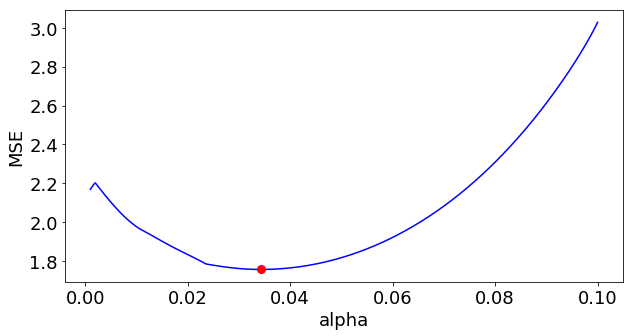

In [45]:
fig, ax = plt.subplots(figsize=(10,5));
ax.plot(lasso.alphas_, mses, color='b');
ax.plot(lasso.alpha_, np.min(mses), marker='o', color='r', markersize=8);
ax.set_xlabel('alpha');
ax.set_ylabel('MSE');

In [46]:
lasso.alpha_

0.0342972972972973

In [47]:
pd.Series(data = np.hstack([lasso.intercept_,lasso.coef_]), index=['Intercept'] + list(X.columns))

Intercept    2.761221
X1           0.000000
X2          -0.000000
X3          -0.000000
X4          -0.000000
X5          -1.570496
X6          -0.000000
X7          -6.255059
X8          -0.000000
X9          -0.082986
X910        -0.000000
dtype: float64

**8f** Now generate a response vector $Y$ according to the model $Y=\beta_0+\beta_7X^7+\epsilon$, and perform best subset selection and the lasso.

In [32]:
b7 = -7
X = np.random.normal(size=100)

Y = b0 + b7*X**7 + eps

df = pd.DataFrame({'X1': X, 'X2': X ** 2, 'X3': X**3, 'X4': X**4,'X5': X**5,
                   'X6': X**6,'X7': X**7,'X8': X**8,'X9': X**9,'X910': X**10,
                   'Y':Y}) #evaluation below kept seeing X10 as the second value, messing some of the max functions up

X = df[df.columns[:-1]]
y = df.Y

In [33]:
best_model(X, y)

RSS                                                      90.4508
adjusted_r2                                             0.999991
model          <statsmodels.regression.linear_model.Regressio...
subset                                              [X1, X2, X7]
Name: 2, dtype: object

In [34]:
lasso = LassoCV(alphas = np.linspace(.001, .1, 1000), tol=.0001,
                   normalize=True, max_iter=100000)
lasso.fit(X, y)

LassoCV(alphas=array([0.001 , 0.0011, ..., 0.0999, 0.1   ]), copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=100000, n_alphas=100,
    n_jobs=1, normalize=True, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [36]:
mses = np.mean(lasso.mse_path_, axis=1)

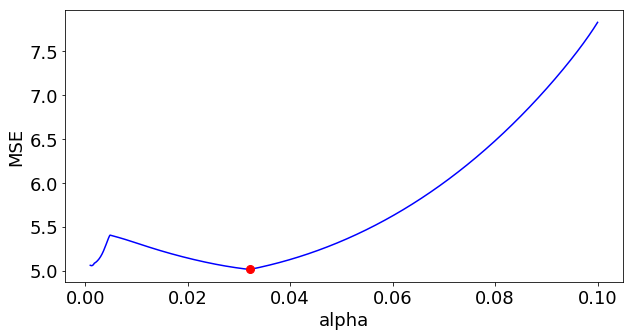

In [37]:
fig, ax = plt.subplots(figsize=(10,5));
ax.plot(lasso.alphas_, mses, color='b');
ax.plot(lasso.alpha_, np.min(mses), marker='o', color='r', markersize=8);
ax.set_xlabel('alpha');
ax.set_ylabel('MSE');

**9**  In this exercise, we will predict the number of applications received using the other variables in the “College” data set.

**9a** Split the data set into a training and a test set.

In [48]:
college = pd.read_csv('data/college.csv')

In [49]:
college['Private'] = np.where(college['Private'] == 'Yes', 1, 0)

In [50]:
college.dtypes

Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [138]:
X = college.drop('Apps', axis=1)

In [139]:
y = college['Apps']

In [140]:
y.mean()

3001.6383526383524

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**9b** Fit a linear model using least squares on the training set, and report the test error obtained.

In [142]:
lr = LinearRegression()
lr.fit(X_train, y_train);

In [143]:
mean_squared_error( y_test, lr.predict(X_test))

1081670.625821871

**9c** Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

In [144]:
alphas = np.logspace(-2, 1, 100)

ridge_cv = RidgeCV(alphas = alphas, normalize=True, store_cv_values=True)

results = ridge_cv.fit(X_train, y_train)

min_alpha = results.alpha_

In [145]:
mean_squared_error(y_test, results.predict(X_test))

1053901.0050185525

**9d** Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [146]:
lasso_cv = LassoCV(alphas = np.logspace(-2,1,100), normalize=True, cv=5, max_iter=100000)
lasso_cv.fit(X_train, y_train);

In [147]:
mean_squared_error(y_test, lasso_cv.predict(X_test))

1081471.7141923464

In [148]:
lasso_cv.coef_

array([-5.22826251e+02,  1.63964956e+00, -1.02764958e+00,  4.16953439e+01,
       -8.36569329e+00,  5.60281808e-02,  3.94920723e-02, -8.44355402e-02,
        1.16831831e-01,  1.30261258e-01,  6.49179603e-02, -7.58890861e+00,
       -5.63462845e+00,  2.25666825e+01,  2.26246497e+00,  8.75630330e-02,
        8.09421379e+00])

**9e** Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [75]:
num_components = np.arange(1,X.shape[1]+1)

scores = []

for n in num_components:
    pca = PCA(n_components=n)
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('linear_regression', LinearRegression())])
    
    pipeline.fit(X_train.values,y_train.values)
    scores.append(-np.mean(cross_val_score(pipeline, X_train.values, y_train.values, 
                                           scoring='neg_mean_squared_error')))

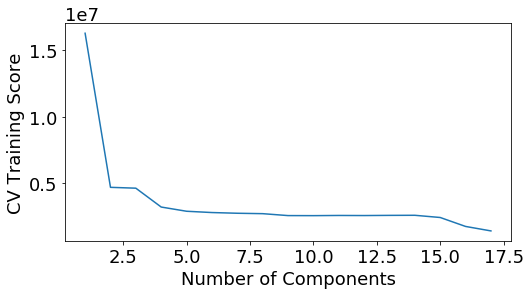

In [76]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(num_components,scores);
ax.set_xlabel('Number of Components');
ax.set_ylabel('CV Training Score');

In [77]:
np.min(scores)

1384308.7835140375

In [78]:
num_components[np.argmin(scores)]

17

**9f** Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [79]:
num_components = np.arange(1,X.shape[1]+1)

scores = []


for n in num_components:
    pls = PLSRegression(n_components=n, scale=True)

    scores.append(-np.mean(cross_val_score(pls, X_train.values, y_train.values, 
                                           scoring='neg_mean_squared_error')))   

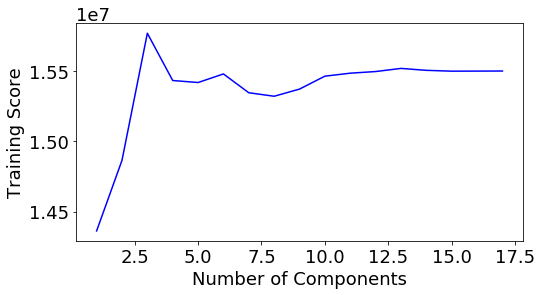

In [80]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(num_components,scores, color='b');
ax.set_xlabel('Number of Components');
ax.set_ylabel('Training Score');

In [81]:
np.min(scores)

14361748.646622287

In [82]:
num_components[np.argmin(scores)]

1

**9g** Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

> The models all perform similarly, excep PLS which performs slightly worse.

**10** We have seen that as a number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

**10a** Generate a data set with $p=20$ features, $n=1000$ observations, and an associated quantitative response vector generated according to the model;

$Y=X\beta+\epsilon$,

where $\beta$ has some elements that are exactly equal to zero.

In [83]:
X = np.random.normal(size=(1000,1))
eps = np.random.normal(size=(1000,1))
betas = np.random.normal(size=(6,))
betas_zero = np.zeros(shape=(4,))
betas = np.append(betas, betas_zero)
Y = betas[0]+betas[1]*X + betas[1]*X + betas[2]*X**2 + betas[3]*X**3 + eps

In [84]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X = poly.fit_transform(X)

In [85]:
col_names = ['Y']+['X_' + str(i) for i in range(0,len(betas))]

df = pd.DataFrame(np.concatenate((Y,X), axis=1), columns=col_names)
df.shape

(1000, 11)

In [86]:
df.head()

,Y,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9
0,-1.918863,-0.848005,0.719112,-0.609810,0.517122,-0.438522,0.371869,-0.315346,0.267415,-0.226769,0.192302
1,-0.531330,1.027510,1.055776,1.084820,1.114663,1.145328,1.176835,1.209210,1.242475,1.276655,1.311775
2,-1.212490,0.275055,0.075655,0.020809,0.005724,0.001574,0.000433,0.000119,0.000033,0.000009,0.000002
3,-3.716883,-0.999066,0.998133,-0.997200,0.996269,-0.995338,0.994408,-0.993480,0.992552,-0.991624,0.990698
4,0.227871,0.758733,0.575675,0.436784,0.331402,0.251445,0.190780,0.144751,0.109827,0.083330,0.063225


**10b** Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [118]:
train_df = df.sample(n=100, random_state=42)
test_df = df.drop(train_df.index)

**10c** Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [119]:
models = best_subsets(train_df[train_df.columns[1:]],train_df.Y)

In [120]:
mses = np.array([])
for model in models.model:
    features = list(model.params.index[1:])
    
    X_train = sm.add_constant(train_df[features])
    
    y_pred = model.predict(X_train)
    
    mses = np.append(mses, mean_squared_error(train_df.Y, y_pred))

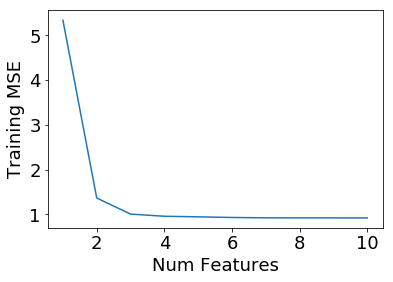

In [121]:
fig, ax = plt.subplots(figsize=(6,4));
ax.plot(range(1,len(features)+1), mses);
ax.set_xlabel('Num Features');
ax.set_ylabel('Training MSE');

**10d** Plot the test set MSE associated with the best model of each size.

In [122]:
mses = np.array([])
for model in models.model:
    features = list(model.params.index[1:])
    
    X_test = sm.add_constant(test_df[features])
    
    y_pred = model.predict(X_test)
    
    mses = np.append(mses, mean_squared_error(test_df.Y, y_pred))

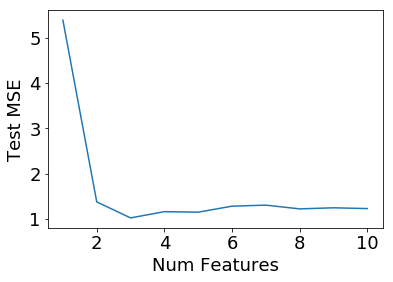

In [123]:
fig, ax = plt.subplots(figsize=(6,4));
ax.plot(range(1,len(features)+1),mses);
ax.set_xlabel('Num Features');
ax.set_ylabel('Test MSE');

**11** We will now try to predict per capita crime rate in the Boston data set.

**11a** Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

In [127]:
boston = pd.read_csv('data/boston.csv')

In [128]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [129]:
features = list(boston.columns[1:])
target = boston.crim

In [130]:
lr = LinearRegression()
-np.mean(cross_val_score(lr, boston[features], boston.crim,
                                  scoring='neg_mean_squared_error', cv=len(boston)))

42.96874021592426

In [131]:
alphas = np.logspace(-2, 1, 100)
ridge = RidgeCV(alphas=alphas, fit_intercept=True, normalize=True, store_cv_values=True)
ridge.fit(boston[features],target)

ridge_mse = np.mean(ridge.cv_values_, axis=0)

In [132]:
np.min(ridge_mse)

42.90833494982518

In [133]:
pd.Series(data = np.hstack([ridge.intercept_,ridge.coef_]), index=['Intercept'] + features)

Intercept    13.888385
zn            0.040021
indus        -0.077533
chas         -0.732037
nox          -8.457866
rm            0.401456
age           0.001326
dis          -0.883139
rad           0.519440
tax          -0.000527
ptratio      -0.220479
black        -0.007915
lstat         0.135332
medv         -0.175396
dtype: float64

In [134]:
alphas = np.logspace(-5, 1, 100)
lasso = LassoCV(alphas=alphas, fit_intercept=True, normalize=True, cv=len(boston))
lasso.fit(boston[features],boston.crim)

lasso_mse = np.mean(lasso.mse_path_, axis=1)

In [135]:
np.min(lasso_mse)

42.87801457719557

In [136]:
pd.Series(data = np.hstack([lasso.intercept_, lasso.coef_]), index=['Intercept'] + features)

Intercept    13.106357
zn            0.036928
indus        -0.072793
chas         -0.594035
nox          -7.379467
rm            0.254224
age           0.000000
dis          -0.812368
rad           0.516800
tax          -0.000000
ptratio      -0.198297
black        -0.007546
lstat         0.125577
medv         -0.162216
dtype: float64

**11b** Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.

**11c** Does your chosen model involve all of the features in the data set?

> The lasso model narrowly arout performs the other two models when we look at the MSE from LOOCV cross-validation. It does not use every predictor, setting age and tax to 0. I played around with the alphas a lot, and that definitely made a difference. A larger range might help me find a better fit, but the run time was becoming to high.